In [28]:
import numpy as np
from utils import rinomina_classi_in_dir, undersample_dataset, count_images_per_class
from train import train
from evaluate import plot_training, evaluate_model, plot_confusion_matrix

In [29]:
# Parametri
original_dir = "DataSet/PlantVillage"
balanced_dir = "DataSet/PlantVillage_Balanced"
img_size = (224, 224)
batch_size = 64
epochs = 10
use_transfer_learning = True

In [30]:
# Rinomina classi
rinomina_classi_in_dir(original_dir)

In [31]:
# Undersampling per bilanciare
undersample_dataset(original_dir, balanced_dir, max_per_class=1000)

✅ Dataset ridotto salvato in: DataSet/PlantVillage_Balanced


In [32]:
# Conta immagini
print("Distribuzione originale:", count_images_per_class(original_dir))
print("Distribuzione bilanciata:", count_images_per_class(balanced_dir))

Distribuzione originale: {'pep_bell_Bacterial_spot': 976, 'pep_bell_healthy': 1478, 'pot_Early_blight': 1000, 'pot_healthy': 152, 'pot_Late_blight': 1000, 'tom_Bacterial_spot': 2127, 'tom_Early_blight': 1000, 'tom_healthy': 1591, 'tom_Late_blight': 1909, 'tom_Leaf_Mold': 952, 'tom_Septoria_leaf_spot': 1771, 'tom_Spider_mites_Two_spotted_spider_mite': 1676, 'tom_Target_Spot': 1404, 'tom_Tomato_mosaic_virus': 373, 'tom_Tomato_YellowLeaf_Curl_Virus': 3208}
Distribuzione bilanciata: {'pep_bell_Bacterial_spot': 976, 'pep_bell_healthy': 1000, 'pot_Early_blight': 1000, 'pot_healthy': 152, 'pot_Late_blight': 1000, 'tom_Bacterial_spot': 1000, 'tom_Early_blight': 1000, 'tom_healthy': 1000, 'tom_Late_blight': 1000, 'tom_Leaf_Mold': 952, 'tom_Septoria_leaf_spot': 1000, 'tom_Spider_mites_Two_spotted_spider_mite': 1000, 'tom_Target_Spot': 1000, 'tom_Tomato_mosaic_virus': 373, 'tom_Tomato_YellowLeaf_Curl_Virus': 1000}


In [ ]:
# Training
model, history, val_generator = train(
    data_dir=balanced_dir,
    img_size=img_size,
    batch_size=batch_size,
    epochs=epochs,
    use_transfer_learning=use_transfer_learning
)


Found 10764 images belonging to 15 classes.
Found 2689 images belonging to 15 classes.


c:\Users\matte\miniconda3\envs\tf-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


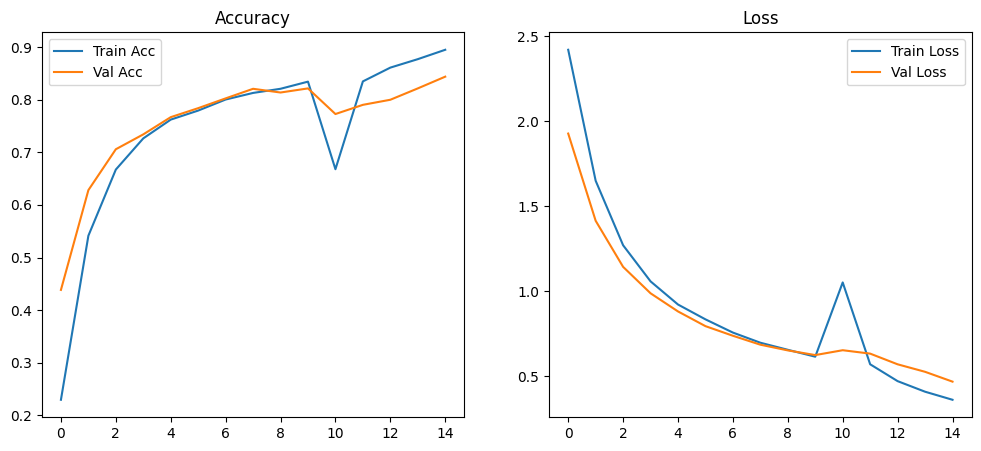

In [ ]:
# Plot training history
plot_training(history)

In [ ]:
# Valutazione
evaluate_model(model, val_generator)

43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 604ms/step
Classification Report:
                                          precision    recall  f1-score   support

                 pep_bell_Bacterial_spot       0.99      0.84      0.91       195
                        pep_bell_healthy       0.91      0.99      0.95       200
                        pot_Early_blight       0.97      0.96      0.97       200
                         pot_Late_blight       0.97      0.89      0.93       200
                             pot_healthy       0.87      0.90      0.89        30
                      tom_Bacterial_spot       0.94      0.80      0.86       200
                        tom_Early_blight       0.85      0.56      0.68       200
                         tom_Late_blight       0.94      0.74      0.83       200
                           tom_Leaf_Mold       0.81      0.88      0.84       190
                  tom_Septoria_leaf_spot       0.69      0.83      0.75       200
tom_Spider_mites_Two_spotted_spi

43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 623ms/step


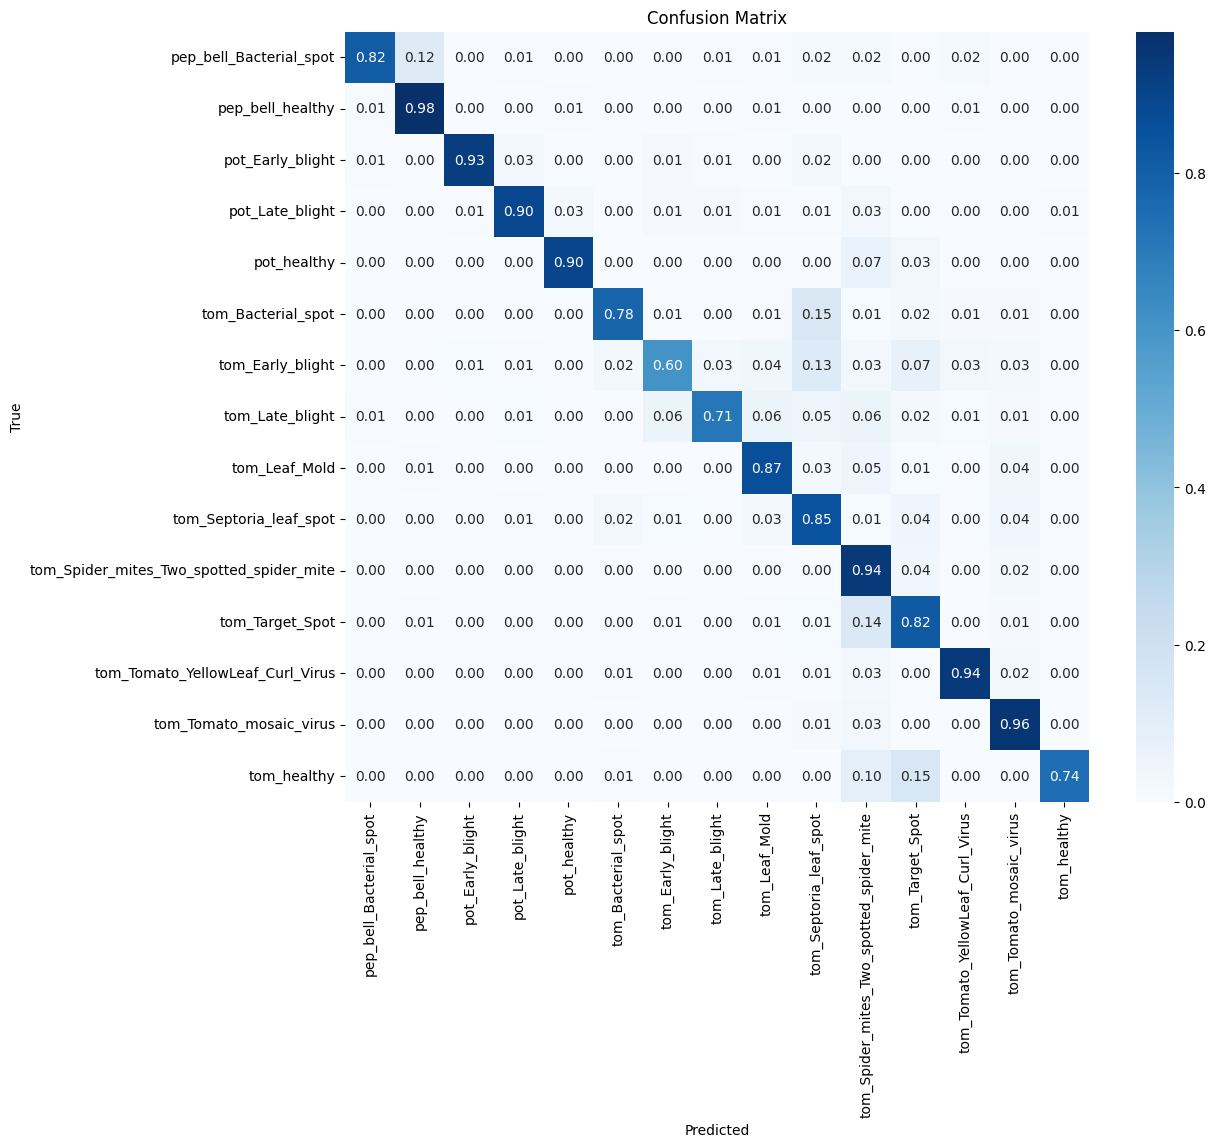

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
y_true = val_generator.classes
val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)
class_names = list(val_generator.class_indices.keys())
plot_confusion_matrix(cm, class_names, normalize=True)